In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
ruta_df = r"D:\DANI LAPTOP\Documentos\Setting\OneDrive - Ucompensar\esp files\Segundo semestre\Seguridad de la información\Proyecto final materia\Data\Ventas_Videojuegos.xlsx"
# Carga el archivo Excel en un DataFrame de pandas
df_ventas = pd.read_excel(ruta_df)

#crear lista con nuevos nombres de columnas y asignar la lista como nombre de columnas del dataframe cargado
nuevos_nombres = ['NOMBRE_JUEGO', 'CONSOLA', 'AÑO_LANZAMIENTO', 'GENERO', 'DISTRIBUIDOR', 'NORTE_AMERICA', 'EUROPA', 'JAPON', 'OTROS', 'TOTAL']
df_ventas.columns = nuevos_nombres


#seleccionar columnas del dataframe y guardarlas como tipo de dato str
df_ventas['NOMBRE_JUEGO'] = df_ventas['NOMBRE_JUEGO'].astype(str)
df_ventas['CONSOLA'] = df_ventas['CONSOLA'].astype(str)
df_ventas['AÑO_LANZAMIENTO'] = df_ventas['AÑO_LANZAMIENTO'].astype(str)
df_ventas['GENERO'] = df_ventas['GENERO'].astype(str)
df_ventas['DISTRIBUIDOR'] = df_ventas['DISTRIBUIDOR'].astype(str)
#df_ventas = df_ventas.drop('Ventas Global', axis=1)


In [7]:
df_ventas
#nuevas preguntas o areas de investigación que obligan a reiniciar el analisis
#Apache dataset

,NOMBRE_JUEGO,CONSOLA,AÑO_LANZAMIENTO,GENERO,DISTRIBUIDOR,NORTE_AMERICA,EUROPA,JAPON,OTROS,TOTAL
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16321,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01
16322,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01
16323,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.00,0.01
16324,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01


In [8]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16326 entries, 0 to 16325
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NOMBRE_JUEGO     16326 non-null  object 
 1   CONSOLA          16326 non-null  object 
 2   AÑO_LANZAMIENTO  16326 non-null  object 
 3   GENERO           16326 non-null  object 
 4   DISTRIBUIDOR     16326 non-null  object 
 5   NORTE_AMERICA    16326 non-null  float64
 6   EUROPA           16326 non-null  float64
 7   JAPON            16326 non-null  float64
 8   OTROS            16326 non-null  float64
 9   TOTAL            16326 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.2+ MB


In [9]:
# Agrupar por la columna "Editorial" y sumar las ventas, incluyendo "Ventas Global"
df_agrupado_ed = df_ventas.groupby('DISTRIBUIDOR').agg({'NORTE_AMERICA': 'sum', 'EUROPA': 'sum', 'JAPON': 'sum', 'OTROS': 'sum', 'TOTAL': 'sum'})

# Ordenar el resultado de forma descendente por la columna "Ventas Global"
df_agrupado_ed = df_agrupado_ed.sort_values(by='TOTAL', ascending=False).reset_index()
df_agrupado_ed = df_agrupado_ed.drop('TOTAL', axis=1)


In [10]:
df_agrupado_ed

,DISTRIBUIDOR,NORTE_AMERICA,EUROPA,JAPON,OTROS
0,Nintendo,815.75,418.30,454.99,95.19
1,Electronic Arts,584.22,367.38,13.98,127.63
2,Activision,426.01,213.72,6.55,74.79
3,Sony Computer Entertainment,265.22,187.55,74.10,80.40
4,Ubisoft,252.54,163.03,7.33,50.14
...,...,...,...,...,...
572,Piacci,0.00,0.00,0.01,0.00
573,New World Computing,0.01,0.00,0.00,0.00
574,Commseed,0.00,0.00,0.01,0.00
575,Michaelsoft,0.00,0.00,0.01,0.00


In [11]:
# Agrupar por la columna "Editorial" y sumar las ventas, incluyendo "Ventas Global"
df_agrupado_gen = df_ventas.groupby('GENERO').agg({'NORTE_AMERICA': 'sum', 'EUROPA': 'sum', 'JAPON': 'sum', 'OTROS': 'sum', 'TOTAL': 'sum'})

# Ordenar el resultado de forma descendente por la columna "Ventas Global"
df_agrupado_gen = df_agrupado_gen.sort_values(by='TOTAL', ascending=False).reset_index()
df_agrupado_gen = df_agrupado_gen.drop('TOTAL', axis=1)


In [12]:
df_agrupado_gen

,GENERO,NORTE_AMERICA,EUROPA,JAPON,OTROS
0,Action,861.80,516.48,158.66,184.92
1,Sports,670.09,371.34,134.76,132.65
2,Shooter,575.16,310.45,38.18,101.90
3,Role-Playing,326.50,187.58,350.29,59.38
4,Platform,445.99,200.67,130.65,51.51
5,Misc,402.48,213.82,106.67,74.02
6,Racing,356.93,236.32,56.62,76.68
7,Fighting,220.74,100.00,87.15,36.19
8,Simulation,181.51,113.20,63.54,31.34
9,Puzzle,122.01,50.53,56.68,12.47


In [13]:
# Agrupar por la columna "Editorial" y sumar las ventas, incluyendo "Ventas Global"
df_agrupado_yr = df_ventas.groupby('AÑO_LANZAMIENTO').agg({'NORTE_AMERICA': 'sum', 'EUROPA': 'sum', 'JAPON': 'sum', 'OTROS': 'sum', 'TOTAL': 'sum'})

# Ordenar el resultado de forma descendente por la columna "Ventas Global"
df_agrupado_yr = df_agrupado_yr.sort_values(by='TOTAL', ascending=False).reset_index()
df_agrupado_yr = df_agrupado_yr.drop('TOTAL', axis=1)


In [14]:
df_agrupado_yr

,AÑO_LANZAMIENTO,NORTE_AMERICA,EUROPA,JAPON,OTROS
0,2008,351.44,184.40,60.27,82.39
1,2009,338.85,191.59,61.89,74.77
2,2007,312.05,160.50,60.29,77.60
3,2010,304.24,176.73,59.49,59.90
4,2006,263.12,129.24,73.73,54.43
5,2011,241.06,167.44,53.04,54.39
6,2005,242.61,121.94,54.28,40.58
7,2004,222.59,107.32,41.65,47.29
8,2002,216.19,109.74,41.76,27.28
9,2013,154.77,125.80,47.59,39.82


In [15]:
# Agrupar por la columna "Editorial" y sumar las ventas, incluyendo "Ventas Global"
df_agrupado_plat = df_ventas.groupby('CONSOLA').agg({'NORTE_AMERICA': 'sum', 'EUROPA': 'sum', 'JAPON': 'sum', 'OTROS': 'sum', 'TOTAL': 'sum'})

# Ordenar el resultado de forma descendente por la columna "Ventas Global"
df_agrupado_plat = df_agrupado_plat.sort_values(by='TOTAL', ascending=False).reset_index()
df_agrupado_plat = df_agrupado_plat.drop('TOTAL', axis=1)


In [16]:
df_agrupado_plat

,CONSOLA,NORTE_AMERICA,EUROPA,JAPON,OTROS
0,PS2,572.92,332.63,137.55,190.47
1,X360,594.33,278.01,12.30,84.67
2,PS3,388.90,340.47,79.21,140.81
3,Wii,497.37,264.35,68.28,79.20
4,DS,388.29,194.07,175.02,60.27
5,PS,334.71,212.38,139.78,40.69
6,GBA,184.12,74.59,46.56,7.61
7,PSP,107.09,67.16,75.89,41.52
8,PS4,96.80,123.70,14.30,43.36
9,PC,92.10,137.64,0.17,24.33


In [17]:
datos_faltantes = df_ventas.isna().sum()

In [18]:
datos_faltantes

NOMBRE_JUEGO       0
CONSOLA            0
AÑO_LANZAMIENTO    0
GENERO             0
DISTRIBUIDOR       0
NORTE_AMERICA      0
EUROPA             0
JAPON              0
OTROS              0
TOTAL              0
dtype: int64

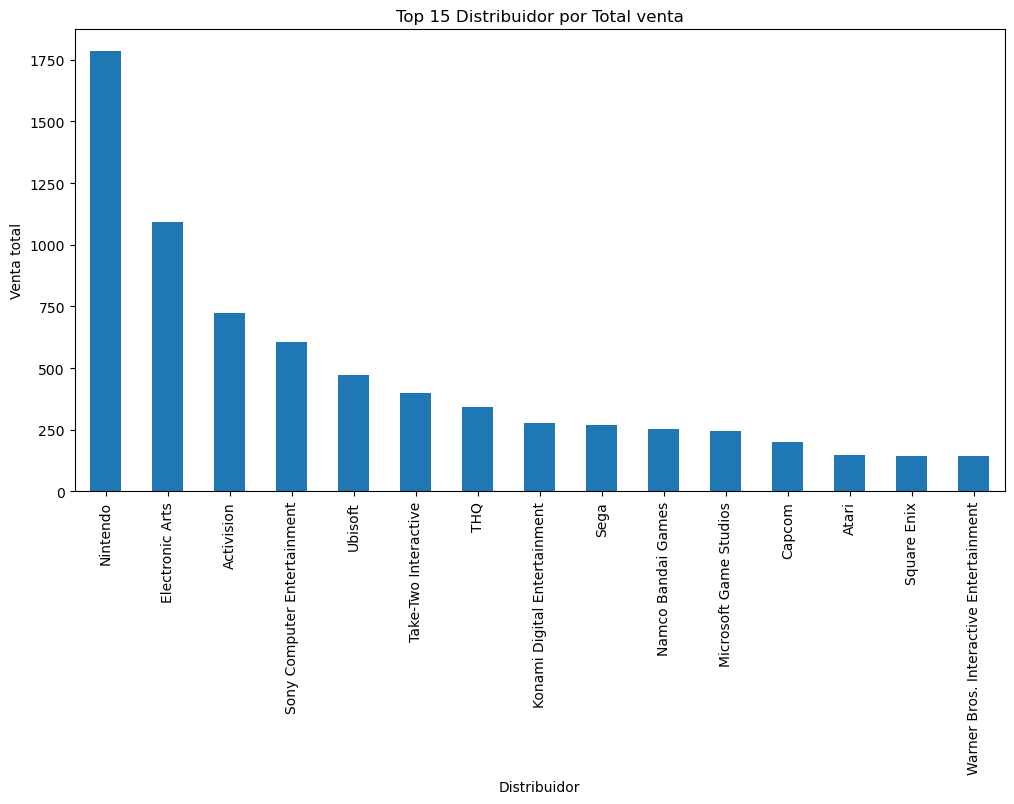

In [19]:
# Agrupar por la columna "Editorial" y sumar las ventas globales
ventas_por_editorial = df_ventas.groupby('DISTRIBUIDOR')['TOTAL'].sum()

# Ordenar en orden descendente y seleccionar las 20 primeras
top_15_editoriales = ventas_por_editorial.sort_values(ascending=False).head(15)

# Crear el gráfico de barras
top_15_editoriales.plot(kind='bar', figsize=(12, 6))
plt.title('Top 15 Distribuidor por Total venta')
plt.xlabel('Distribuidor')
plt.ylabel('Venta total')
plt.xticks(rotation=90)

plt.show()

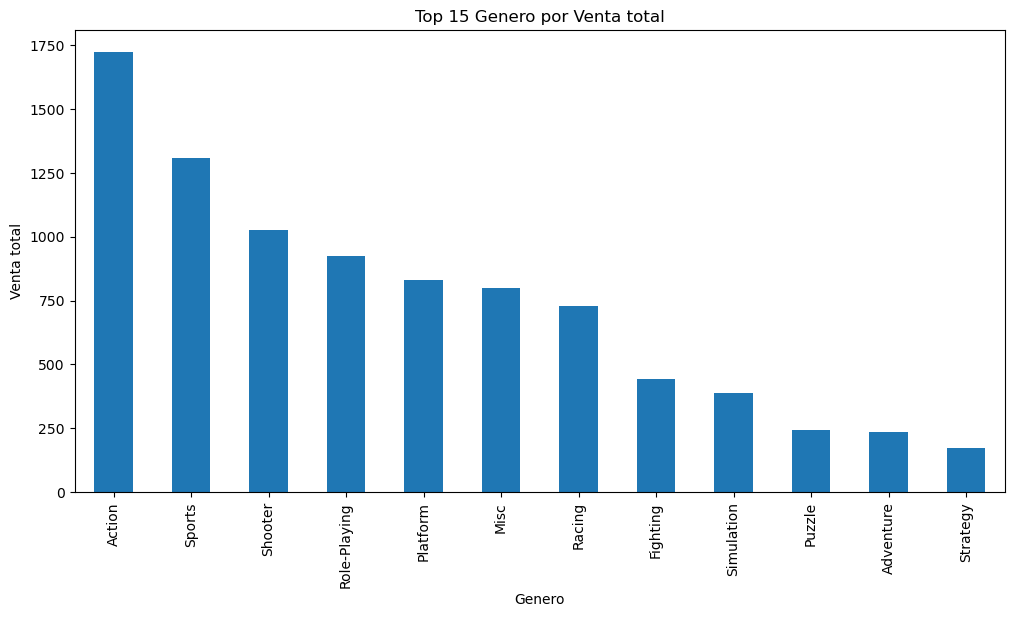

In [20]:
# Agrupar por la columna "Editorial" y sumar las ventas globales
ventas_por_genero = df_ventas.groupby('GENERO')['TOTAL'].sum()

# Ordenar en orden descendente y seleccionar las 20 primeras
top_15_genero = ventas_por_genero.sort_values(ascending=False).head(15)

# Crear el gráfico de barras
top_15_genero.plot(kind='bar', figsize=(12, 6))
plt.title('Top 15 Genero por Venta total')
plt.xlabel('Genero')
plt.ylabel('Venta total')
plt.xticks(rotation=90)

plt.show()

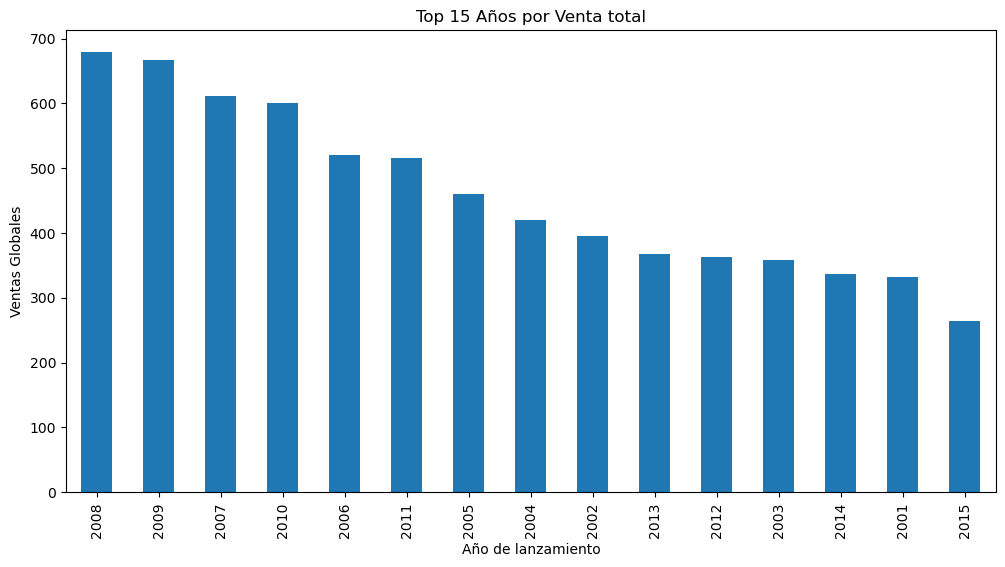

In [21]:
# Agrupar por la columna "Editorial" y sumar las ventas globales
ventas_por_anio = df_ventas.groupby('AÑO_LANZAMIENTO')['TOTAL'].sum()

# Ordenar en orden descendente y seleccionar las 20 primeras
top_15_anio = ventas_por_anio.sort_values(ascending=False).head(15)

# Crear el gráfico de barras
top_15_anio.plot(kind='bar', figsize=(12, 6))
plt.title('Top 15 Años por Venta total')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=90)

plt.show()

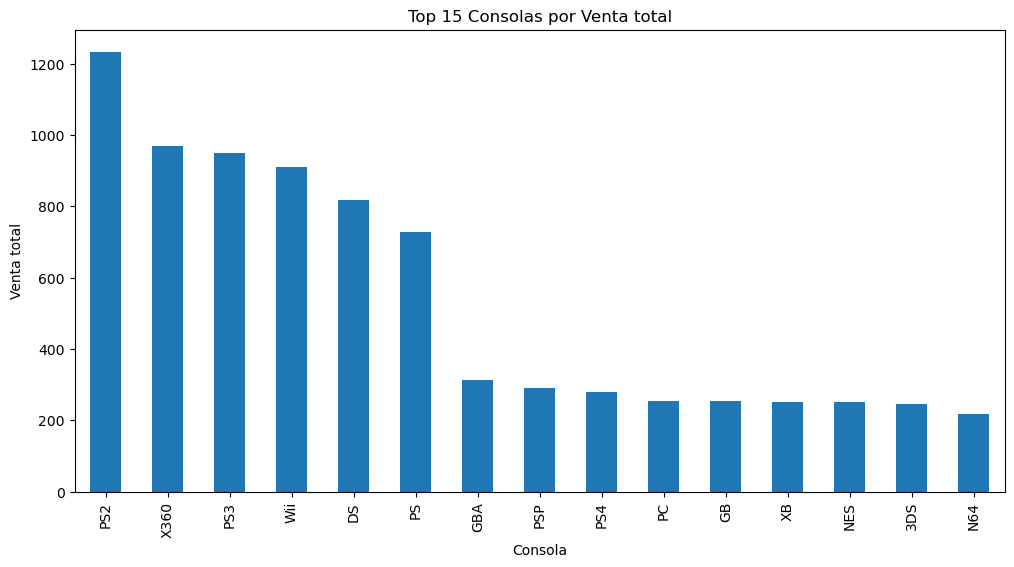

In [22]:
# Agrupar por la columna "Editorial" y sumar las ventas globales
ventas_por_plat = df_ventas.groupby('CONSOLA')['TOTAL'].sum()

# Ordenar en orden descendente y seleccionar las 20 primeras
top_15_plat = ventas_por_plat.sort_values(ascending=False).head(15)

# Crear el gráfico de barras
top_15_plat.plot(kind='bar', figsize=(12, 6))
plt.title('Top 15 Consolas por Venta total')
plt.xlabel('Consola')
plt.ylabel('Venta total')
plt.xticks(rotation=90)

plt.show()